## Brandon O'Briant
### MSPA Software and New Course Preferences EDA

In [1]:
#  Python analysis of MSPA Software Survey

# tested under Python 3.6.1 :: Anaconda custom (x86_64)
# on Windows 10.0

# visualizations in this program are routed to external pdf files
# so they may be included in printed or electronic reports

# prepare for Python version 3x features and functions
# these two lines of code are needed for Python 2.7 only
# commented out for Python 3.x versions
# from __future__ import division, print_function
# from future_builtins import ascii, filter, hex, map, oct, zip

In [2]:
import pandas as pd  # data frame operations  
from pandas import set_option
import numpy as np  # arrays and math functions
import matplotlib.pyplot as plt  # static plotting
import seaborn as sns  # pretty plotting, including heat map
import numpy.random as random
import os # checking and changing working directory
#from statsmodels.formula.api import ols

In [3]:
# path to desired working directory ** YOUR working directory goes here**
WORKING_DIRECTORY_PATH = 'YOUR_WORKING_DIRECTORY_GOES_HERE'

# set working directory to desired path
os.chdir(WORKING_DIRECTORY_PATH)

In [4]:
# print current working directory
#os.getcwd()

In [5]:
# overrides the default rcParams for plotting
def init_plotting():
    plt.style.use(style='ggplot')
    plt.rcParams['figure.figsize'] = (10.0, 8.0)
    plt.rcParams['font.family'] = 'serif'
    plt.rcParams['text.color'] = 'black'
    plt.rcParams['axes.labelcolor'] = 'black'
    plt.rcParams['xtick.color']= 'black'
    plt.rcParams['ytick.color']= 'black'

init_plotting()
# avoid empty plot, always good to close plot
plt.close() 

In [6]:
# correlation heat map setup for seaborn
def corr_chart(df_corr):
    corr=df_corr.corr()
    #screen top half to get a triangle
    top = np.zeros_like(corr, dtype=np.bool)
    top[np.triu_indices_from(top)] = True
    fig=plt.figure()
    fig, ax = plt.subplots(figsize=(12,12))
    sns.heatmap(corr, mask=top, cmap='coolwarm', 
        center = 0, square=True, 
        linewidths=.5, cbar_kws={'shrink':.5}, 
        annot = True, annot_kws={'size': 9}, fmt = '.3f')           
    plt.xticks(rotation=45) # rotate variable labels on columns (x axis)
    plt.yticks(rotation=0) # use horizontal variable labels on rows (y axis)
    plt.title('Correlation Heat Map')   
    plt.savefig('plot-corr-map.pdf', 
        bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
        orientation='portrait', papertype=None, format=None, 
        transparent=True, pad_inches=0.25, frameon=None)      

np.set_printoptions(precision=3)

In [7]:
# function for importing csv data using pandas package
def load_csv(filename):
    data = pd.read_csv(filename)
    return data

# load train and test datasets
valid_survey_input = load_csv('mspa-survey-data.csv')


In [8]:
# use the RespondentID as label for the rows... the index of DataFrame
valid_survey_input.set_index('RespondentID', drop = True, inplace = True)

In [9]:
# examine the structure of the DataFrame object
print('\n----------Contents of initial survey data ---------------')


----------Contents of initial survey data ---------------


In [10]:
# could use len() or first index of shape() to get number of rows/observations
print("\n----------Number of Respondents---------------\n{}".format(len(valid_survey_input)))
      
# Dimensions of the data
print("\n----------Valid Survey Input DataFrame Demensions---------------\n{}".format(valid_survey_input.shape))



----------Number of Respondents---------------
207

----------Valid Survey Input DataFrame Demensions---------------
(207, 40)


In [11]:
# take a peek at the first 10 rows in Dataframe
print("\n----------Valid Survey Input First 10 Records---------------\n{}".format(valid_survey_input.head(10)))


----------Valid Survey Input First 10 Records---------------
              Personal_JavaScalaSpark  Personal_JavaScriptHTMLCSS  \
RespondentID                                                        
5135740122                          0                           0   
5133300037                         10                          10   
5132253300                         20                           0   
5132096630                         10                          10   
5131990362                         20                           0   
5131860849                         25                          15   
5131698528                         20                           0   
5130809490                          0                           0   
5130188921                         30                          15   
5129721525                          0                           0   

              Personal_Python  Personal_R  Personal_SAS  \
RespondentID                                      

In [12]:
# Data type for each attribute
print("\n----------Valid Survey Input Data Types---------------\n{}".format(valid_survey_input.dtypes))


----------Valid Survey Input Data Types---------------
Personal_JavaScalaSpark               int64
Personal_JavaScriptHTMLCSS            int64
Personal_Python                       int64
Personal_R                            int64
Personal_SAS                          int64
Professional_JavaScalaSpark           int64
Professional_JavaScriptHTMLCSS        int64
Professional_Python                   int64
Professional_R                        int64
Professional_SAS                      int64
Industry_JavaScalaSpark               int64
Industry_JavaScriptHTMLCSS            int64
Industry_Python                       int64
Industry_R                            int64
Industry_SAS                          int64
Python_Course_Interest              float64
Foundations_DE_Course_Interest      float64
Analytics_App_Course_Interest       float64
Systems_Analysis_Course_Interest    float64
Courses_Completed                   float64
PREDICT400                           object
PREDICT401          

In [13]:
# show the column/variable names of the DataFrame
# note that RespondentID is no longer present
print("\n----------Valid Survey Input Columns---------------\n{}".format(valid_survey_input.columns))


----------Valid Survey Input Columns---------------
Index(['Personal_JavaScalaSpark', 'Personal_JavaScriptHTMLCSS',
       'Personal_Python', 'Personal_R', 'Personal_SAS',
       'Professional_JavaScalaSpark', 'Professional_JavaScriptHTMLCSS',
       'Professional_Python', 'Professional_R', 'Professional_SAS',
       'Industry_JavaScalaSpark', 'Industry_JavaScriptHTMLCSS',
       'Industry_Python', 'Industry_R', 'Industry_SAS',
       'Python_Course_Interest', 'Foundations_DE_Course_Interest',
       'Analytics_App_Course_Interest', 'Systems_Analysis_Course_Interest',
       'Courses_Completed', 'PREDICT400', 'PREDICT401', 'PREDICT410',
       'PREDICT411', 'PREDICT413', 'PREDICT420', 'PREDICT422', 'PREDICT450',
       'PREDICT451', 'PREDICT452', 'PREDICT453', 'PREDICT454', 'PREDICT455',
       'PREDICT456', 'PREDICT457', 'OtherPython', 'OtherR', 'OtherSAS',
       'Other', 'Graduate_Date'],
      dtype='object')


In [14]:
# abbreviated printing of the first five rows of the data frame
print("\n----------Valid Survey Input First 5 Rows of DataFrame---------------\n{}".format(pd.DataFrame.head(valid_survey_input))) 


----------Valid Survey Input First 5 Rows of DataFrame---------------
              Personal_JavaScalaSpark  Personal_JavaScriptHTMLCSS  \
RespondentID                                                        
5135740122                          0                           0   
5133300037                         10                          10   
5132253300                         20                           0   
5132096630                         10                          10   
5131990362                         20                           0   

              Personal_Python  Personal_R  Personal_SAS  \
RespondentID                                              
5135740122                  0          50            50   
5133300037                 50          30             0   
5132253300                 40          40             0   
5132096630                 25          35            20   
5131990362                  0          70            10   

              Professional_Java

In [15]:
# shorten the variable/column names for software preference variables
survey_df = valid_survey_input.rename(index=str, columns={'Personal_JavaScalaSpark': 'My_Java',
    'Personal_JavaScriptHTMLCSS': 'My_JS',
    'Personal_Python': 'My_Python',
    'Personal_R': 'My_R',
    'Personal_SAS': 'My_SAS',
    'Professional_JavaScalaSpark': 'Prof_Java',
    'Professional_JavaScriptHTMLCSS': 'Prof_JS',
    'Professional_Python': 'Prof_Python',
    'Professional_R': 'Prof_R',
    'Professional_SAS': 'Prof_SAS',
    'Industry_JavaScalaSpark': 'Ind_Java',
    'Industry_JavaScriptHTMLCSS': 'Ind_JS',
    'Industry_Python': 'Ind_Python',
    'Industry_R': 'Ind_R',
    'Industry_SAS': 'Ind_SAS'})

In [16]:
# define subset DataFrame for analysis of software preferences 
software_df = survey_df.loc[:, 'My_Java':'Ind_SAS']

# remove outliers from software preference DataFrame
#software_df=software_df[software_df.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]

In [17]:
# define subset DataFrame for analysis of courses completed
courses_completed_df = survey_df.loc[:, 'PREDICT453':'PREDICT457'].dropna(how='all')

In [18]:
# define subset DataFrame for analysis of potiential new courses preference
potiential_new_courses_df = survey_df.loc[:, 'Python_Course_Interest':'Systems_Analysis_Course_Interest'].dropna(how='all')

# remove outliers from  potiential new courses preference DataFrame
#potiential_new_courses_df=potiential_new_courses_df[potiential_new_courses_df.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]

In [19]:
# descriptive statistics for software preference variables
print('\nDescriptive statistics for survey data ---------------')

#set layout and value formatting for printing Dataframe
set_option('display.width', 60)
set_option('precision', 3) # three significant figures

# print survery DataFrame descriptive statistics
print("\n----------Survey DataFrame Descriptive Statistics---------------\n{}".format(survey_df.describe()))

with open("survey_df_descriptive_statistics.txt", "w") as text_file:
    text_file.write("\n----------Survey DataFrame Descriptive Statistics---------------\n{}".format(str(survey_df.describe())))


Descriptive statistics for survey data ---------------

----------Survey DataFrame Descriptive Statistics---------------
       My_Java    My_JS  My_Python     My_R   My_SAS  \
count  207.000  207.000    207.000  207.000  207.000   
mean    10.135    4.797     31.304   37.126   16.638   
std     11.383    6.758     15.571   14.576   13.626   
min      0.000    0.000      0.000    0.000    0.000   
25%      0.000    0.000     20.000   30.000    5.000   
50%      9.000    0.000     30.000   35.000   15.000   
75%     20.000   10.000     40.000   50.000   25.000   
max     70.000   30.000     90.000  100.000   75.000   

       Prof_Java  Prof_JS  Prof_Python   Prof_R  Prof_SAS  \
count    207.000  207.000      207.000  207.000   207.000   
mean       9.251    5.841       30.029   36.415    18.464   
std       13.168   10.813       19.145   20.848    18.832   
min        0.000    0.000        0.000    0.000     0.000   
25%        0.000    0.000       20.000   25.000     0.000   
50%    

In [20]:
# print the skewness of the distribution for survey variables
print("\n----------Skewness of the distribution for survey variables---------------\n{}".format(survey_df.skew()))
with open("survey_variables_skewness.txt", "w") as text_file:
    text_file.write("\n----------Skewness of the distribution for survey variables---------------\n{}".format(str(survey_df.skew())))


----------Skewness of the distribution for survey variables---------------
My_Java                             1.414
My_JS                               1.371
My_Python                           0.645
My_R                                0.890
My_SAS                              0.857
Prof_Java                           2.134
Prof_JS                             4.238
Prof_Python                         0.618
Prof_R                              0.813
Prof_SAS                            1.393
Ind_Java                            1.413
Ind_JS                              1.754
Ind_Python                          0.596
Ind_R                               0.338
Ind_SAS                             1.322
Python_Course_Interest             -1.037
Foundations_DE_Course_Interest     -0.238
Analytics_App_Course_Interest      -0.147
Systems_Analysis_Course_Interest   -0.060
Courses_Completed                   0.093
dtype: float64


In [21]:
# print the skewness of the distribution for survey variables
print("\n----------Kurtosis of the distribution for survey variables---------------\n{}".format(survey_df.kurtosis()))

with open("survey_df_kurtosis.txt", "w") as text_file:
    text_file.write("\n----------Kurtosis of the distribution for survey variables---------------\n{}".format(str(survey_df.kurtosis())))


----------Kurtosis of the distribution for survey variables---------------
My_Java                              3.212
My_JS                                1.146
My_Python                            1.831
My_R                                 1.849
My_SAS                               1.081
Prof_Java                            6.193
Prof_JS                             29.216
Prof_Python                          0.960
Prof_R                               1.220
Prof_SAS                             2.945
Ind_Java                             1.724
Ind_JS                               3.582
Ind_Python                           0.991
Ind_R                                0.709
Ind_SAS                              2.047
Python_Course_Interest              -0.038
Foundations_DE_Course_Interest      -1.192
Analytics_App_Course_Interest       -1.397
Systems_Analysis_Course_Interest    -1.344
Courses_Completed                   -1.090
dtype: float64


In [22]:
# descriptive statistics for software preference variables
print("\n----------Descriptive statistics for software preference data ---------------\n{}".format(software_df.describe()))
# set layout and value formatting for printing Dataframe
set_option('display.width', 60)
set_option('precision', 3) # three significant figures

with open("software_preferences_df_descriptive_statistics.txt", "w") as text_file:
    text_file.write("\n----------Descriptive statistics for software preference data ---------------\n{}".format(str(software_df.describe())))


----------Descriptive statistics for software preference data ---------------
       My_Java    My_JS  My_Python     My_R   My_SAS  \
count  207.000  207.000    207.000  207.000  207.000   
mean    10.135    4.797     31.304   37.126   16.638   
std     11.383    6.758     15.571   14.576   13.626   
min      0.000    0.000      0.000    0.000    0.000   
25%      0.000    0.000     20.000   30.000    5.000   
50%      9.000    0.000     30.000   35.000   15.000   
75%     20.000   10.000     40.000   50.000   25.000   
max     70.000   30.000     90.000  100.000   75.000   

       Prof_Java  Prof_JS  Prof_Python   Prof_R  Prof_SAS  \
count    207.000  207.000      207.000  207.000   207.000   
mean       9.251    5.841       30.029   36.415    18.464   
std       13.168   10.813       19.145   20.848    18.832   
min        0.000    0.000        0.000    0.000     0.000   
25%        0.000    0.000       20.000   25.000     0.000   
50%        5.000    0.000       30.000   33.000   

In [23]:
# calculate mean values for software preferences
meanValues_for_software_df = pd.DataFrame(software_df.mean().dropna())

# sort values
meanValues_for_software_df[0].sort_values()

# calc median value of the means
medianValue_of_Means_software = meanValues_for_software_df .median()

# boolean mask, greater than median value of means
greaterThan_meadianOfMeans_software = meanValues_for_software_df['My_Java':'Ind_SAS'] > medianValue_of_Means_software 

# sort values
greaterThan_meadianOfMeans_software[0].sort_values()



My_Java        False
My_JS          False
My_SAS         False
Prof_Java      False
Prof_JS        False
Prof_SAS       False
Ind_Java       False
Ind_JS         False
My_Python       True
My_R            True
Prof_Python     True
Prof_R          True
Ind_Python      True
Ind_R           True
Ind_SAS         True
Name: 0, dtype: bool

In [24]:
# get totals for my_python, my_r, and my_sas software preferences
my_python_software_preference = software_df['My_Python'].sum()
my_r_software_preference = software_df['My_R'].sum()
my_sas_software_preference = software_df['My_SAS'].sum()

# total value for software preferences
my_software_pereference_total = my_python_software_preference + my_r_software_preference + my_sas_software_preference  

# calc percent of total for 'my' software perferences
my_python_software_preference_perc = 100 * my_python_software_preference / my_software_pereference_total
my_r_software_preference_perc = 100 * my_r_software_preference / my_software_pereference_total
my_sas_software_preference_perc = 100 * my_sas_software_preference / my_software_pereference_total

print("\nPython Personal Preference Percent --------\n{:.{prec}f} %".format(my_python_software_preference_perc, prec=2))
print("\nR Personal Preference Percent -------------\n{:.{prec}f} %".format(my_r_software_preference_perc, prec=2))
print("\nSAS Personal Preference Percent -----------\n{:.{prec}f} %".format(my_sas_software_preference_perc, prec=2))


Python Personal Preference Percent --------
36.80 %

R Personal Preference Percent -------------
43.64 %

SAS Personal Preference Percent -----------
19.56 %


In [25]:

# get totals for prof_python, prof_r, and prof_sas software preferences
prof_python_software_preference = software_df['Prof_Python'].sum()
prof_r_software_preference = software_df['Prof_R'].sum()
prof_sas_software_preference = software_df['Prof_SAS'].sum()

# total value for 'prof' software preferences
prof_software_pereference_total = prof_python_software_preference + prof_r_software_preference + prof_sas_software_preference  

# calc percent of total for 'prof' software perferences
prof_python_software_preference_perc = 100*prof_python_software_preference / prof_software_pereference_total
prof_r_software_preference_perc = 100*prof_r_software_preference / prof_software_pereference_total
prof_sas_software_preference_perc = 100*prof_sas_software_preference / prof_software_pereference_total

print("\nPython Professional Preference Percent --------\n{:.{prec}f} %".format(prof_python_software_preference_perc, prec=2))
print("\nR Professional Preference Percent -------------\n{:.{prec}f} %".format(prof_r_software_preference_perc, prec=2))
print("\nSAS Professional Preference Percent -----------\n{:.{prec}f} %".format(prof_sas_software_preference_perc, prec=2))


Python Professional Preference Percent --------
35.37 %

R Professional Preference Percent -------------
42.89 %

SAS Professional Preference Percent -----------
21.75 %


In [26]:
# get totals for prof_python, prof_r, and prof_sas software preferences
ind_python_software_preference = software_df['Ind_Python'].sum()
ind_r_software_preference = software_df['Ind_R'].sum()
ind_sas_software_preference = software_df['Ind_SAS'].sum()

# total value for 'ind' software preferences
ind_software_pereference_total = ind_python_software_preference + ind_r_software_preference + ind_sas_software_preference  

# calc percent of total for 'ind' software perferences
ind_python_software_preference_perc = 100*ind_python_software_preference / ind_software_pereference_total
ind_r_software_preference_perc = 100*ind_r_software_preference / ind_software_pereference_total
ind_sas_software_preference_perc = 100*ind_sas_software_preference / ind_software_pereference_total

print("\nPython Industry Preference Percent --------\n{:.{prec}f} %".format(ind_python_software_preference_perc, prec=2))
print("\nR Industry Preference Percent -------------\n{:.{prec}f} %".format(ind_r_software_preference_perc, prec=2))
print("\nSAS Industry Preference Percent -----------\n{:.{prec}f} %".format(ind_sas_software_preference_perc, prec=2))


Python Industry Preference Percent --------
36.72 %

R Industry Preference Percent -------------
40.00 %

SAS Industry Preference Percent -----------
23.29 %


In [27]:
# # get totals for software preferences
python_pereference_total = my_python_software_preference +  prof_python_software_preference +  ind_python_software_preference  
r_pereference_total = my_r_software_preference +  prof_r_software_preference +  ind_r_software_preference  
sas_pereference_total = my_sas_software_preference +  prof_sas_software_preference +  ind_sas_software_preference  

# total value for software preferences
software_pereference_total = python_pereference_total + r_pereference_total + sas_pereference_total

# calc percent of total for software perferences
python_pereference_total_perc = 100*python_pereference_total / software_pereference_total
r_pereference_total_perc = 100*r_pereference_total / software_pereference_total
sas_pereference_total_perc = 100*sas_pereference_total / software_pereference_total

print("\nPython  Preference Percent --------\n{:.{prec}f} %".format(python_pereference_total_perc, prec=2))
print("\nR  Preference Percent -------------\n{:.{prec}f} %".format(r_pereference_total_perc, prec=2))
print("\nSAS  Preference Percent -----------\n{:.{prec}f} %".format(sas_pereference_total_perc, prec=2))


Python  Preference Percent --------
36.29 %

R  Preference Percent -------------
42.21 %

SAS  Preference Percent -----------
21.50 %


In [28]:
# descriptive statistic for potiential new courses
#set_option('precision', 3)
print("\n------Descriptive statistics for potiential new courses ---------------\n{}"
      .format(potiential_new_courses_df.describe().transpose()))

# set layout and value formatting for printing Dataframe
set_option('display.width', 60)


with open("potiential_new_courses_descriptive_statistics.txt", "w") as text_file:
    text_file.write("\n------Descriptive statistics for potiential new courses ---------------\n{}"
                    .format(str(potiential_new_courses_df.describe().transpose())))


------Descriptive statistics for potiential new courses ---------------
                                  count    mean     std  \
Python_Course_Interest            206.0  73.529  29.835   
Foundations_DE_Course_Interest    200.0  58.045  32.588   
Analytics_App_Course_Interest     203.0  55.202  34.148   
Systems_Analysis_Course_Interest  200.0  53.630  33.539   

                                  min   25%   50%     75%  \
Python_Course_Interest            0.0  53.0  82.5  100.00   
Foundations_DE_Course_Interest    0.0  29.5  60.0   89.25   
Analytics_App_Course_Interest     0.0  25.0  60.0   85.00   
Systems_Analysis_Course_Interest  0.0  21.5  51.5   80.25   

                                    max  
Python_Course_Interest            100.0  
Foundations_DE_Course_Interest    100.0  
Analytics_App_Course_Interest     100.0  
Systems_Analysis_Course_Interest  100.0  


In [29]:
# # get totals for course interest
python_Course_Interest_total = potiential_new_courses_df['Python_Course_Interest'].sum()
foundations_DE_Course_Interest_total = potiential_new_courses_df['Foundations_DE_Course_Interest'].sum()
analytics_App_Course_Interest_total = potiential_new_courses_df['Analytics_App_Course_Interest'].sum()
systems_Analysis_Course_Interest_total = potiential_new_courses_df['Systems_Analysis_Course_Interest'].sum()

# total value for course preference
potiential_new_courses_total = python_Course_Interest_total + foundations_DE_Course_Interest_total + analytics_App_Course_Interest_total + systems_Analysis_Course_Interest_total

# calc percent of total for course interest
python_Course_Interest_perc = 100 * python_Course_Interest_total / potiential_new_courses_total
foundations_DE_Course_Interest_perc = 100 * foundations_DE_Course_Interest_total / potiential_new_courses_total
analytics_App_Course_Interest_perc = 100 * analytics_App_Course_Interest_total / potiential_new_courses_total
systems_Analysis_Course_Interest_perc =  100 * systems_Analysis_Course_Interest_total / potiential_new_courses_total


print("\nPython Course Interest Percent -------------------\n{:.{prec}f} %".format(python_Course_Interest_perc, prec=2))
print("\nFoundations DE Course Interest Percent -----------\n{:.{prec}f} %".format(foundations_DE_Course_Interest_perc, prec=2))
print("\nAnalytics App Course Interest Percent ------------\n{:.{prec}f} %".format(analytics_App_Course_Interest_perc, prec=2))
print("\nSystems Analysis Course Interest Percent ---------\n{:.{prec}f} %".format(systems_Analysis_Course_Interest_perc, prec=2))




Python Course Interest Percent -------------------
31.11 %

Foundations DE Course Interest Percent -----------
23.84 %

Analytics App Course Interest Percent ------------
23.02 %

Systems Analysis Course Interest Percent ---------
22.03 %


In [30]:
# descriptive statistic for courses completed
print("\n------Descriptive statistics for courses completed ---------------\n{}"
      .format(survey_df.Courses_Completed.describe()))

with open("courses_completed_descriptive_statistics.txt", "w") as text_file:
    text_file.write("\n------Descriptive statistics for courses completed ---------------\n{}"
      .format(str(survey_df.Courses_Completed.describe())))


------Descriptive statistics for courses completed ---------------
count    187.000
mean       6.342
std        3.171
min        1.000
25%        4.000
50%        6.000
75%        9.000
max       12.000
Name: Courses_Completed, dtype: float64


In [31]:
# Dataframe consisting of survey data corresponding to graduation dates of Fall 2016
survey_fall_2016_df = survey_df[survey_df.Graduate_Date == 'Fall 2016']

# Dataframe consisting of software preferences for graduation dates of Fall 2016
software_2016_df = survey_fall_2016_df.loc[:,'My_Java':'Ind_SAS']

# Sanity check
#software_2016_df.head(10)

# Descriptive statistics for software pereferences for Graduate dates in 2016.
print("\nDescriptive statistics for software pereferences.\n----------- Graduate dates in 2016. -------------\n{}"
      .format(software_2016_df.describe()))

with open("software_preference_2016.txt", "w") as text_file:
    text_file.write("\nDescriptive statistics for software pereferences.\n----------- Graduate dates in 2016. -------------\n{}"
      .format(str(software_2016_df.describe())))


Descriptive statistics for software pereferences.
----------- Graduate dates in 2016. -------------
       My_Java   My_JS  My_Python    My_R  My_SAS  \
count   13.000  13.000     13.000  13.000  13.000   
mean    16.154   3.462     30.385  35.000  15.000   
std     12.609   5.911     11.808  10.992   8.898   
min      0.000   0.000      0.000  20.000   0.000   
25%      5.000   0.000     25.000  30.000  10.000   
50%     20.000   0.000     35.000  35.000  15.000   
75%     20.000   5.000     40.000  40.000  20.000   
max     40.000  20.000     40.000  60.000  30.000   

       Prof_Java  Prof_JS  Prof_Python  Prof_R  Prof_SAS  \
count     13.000   13.000       13.000  13.000    13.000   
mean      15.000    3.077       24.231  29.231    28.462   
std       21.985    4.349       17.422  14.555    23.838   
min        0.000    0.000        0.000   0.000     0.000   
25%        0.000    0.000       15.000  20.000    10.000   
50%       10.000    0.000       20.000  30.000    40.000   
7

In [32]:
#Dataframe, consists of survey data with corresponding Graduate_Date of Fall 2017
survey_fall_2017_df = survey_df[survey_df.Graduate_Date == 'Fall 2017']
#fall_2017_df.head(10)
#fall_2017_df.describe()

#Dataframe, consists of survey data with corresponding Graduate_Date of Winter 2017
survey_winter_2017_df = survey_df[survey_df.Graduate_Date == 'Winter 2017']
#winter_2017_df.head(10)
#winter_2017_df.describe()

#Dataframe, consists of survey data with corresponding Graduate_Date of Spring 2017
survey_spring_2017_df = survey_df[survey_df.Graduate_Date == 'Spring 2017']
#spring_2017_df.head(10)
#spring_2017_df.describe()

#Dataframe, consists of survey data with corresponding Graduate_Date of Summer 2017
survey_summer_2017_df = survey_df[survey_df.Graduate_Date == 'Summer 2017']
#summer_2017_df.head(10)
#summer_2017_df.describe()

#dataframe consisting of survey data with corresponding graduation dates of 2017
survey_2017_df = pd.concat([survey_fall_2017_df, survey_winter_2017_df, 
                            survey_spring_2017_df, survey_summer_2017_df], 
                           ignore_index=False)

#dataframe consisting of software preferences for graduation dates in 2017
software_2017_df = survey_2017_df.loc[:, 'My_Java':'Ind_SAS']

#sanity check
#software_2017_df.head()


#descriptive statistics for software preferences for 2017 graduations dates
print("\nDescriptive statistics for software pereferences.\n----------- Graduate dates in 2017 -------------\n{}"
      .format(software_2017_df.describe()))

with open("software_preference_2017.txt", "w") as text_file:
    text_file.write("\nDescriptive statistics for software pereferences.\n----------- Graduate dates in 2017 -------------\n{}"
      .format(str(software_2017_df.describe())))


Descriptive statistics for software pereferences.
----------- Graduate dates in 2017 -------------
       My_Java   My_JS  My_Python     My_R  My_SAS  \
count   72.000  72.000     72.000   72.000  72.000   
mean    10.306   4.153     32.694   37.403  15.444   
std     12.740   5.568     17.509   17.382  13.215   
min      0.000   0.000      0.000    0.000   0.000   
25%      0.000   0.000     20.000   28.750   5.000   
50%      9.500   0.000     30.000   31.000  10.000   
75%     20.000  10.000     40.000   50.000  25.000   
max     70.000  20.000     90.000  100.000  50.000   

       Prof_Java  Prof_JS  Prof_Python   Prof_R  Prof_SAS  \
count     72.000   72.000       72.000   72.000    72.000   
mean       8.750    6.250       32.125   37.778    15.097   
std       11.344   13.048       21.749   22.791    15.521   
min        0.000    0.000        0.000    0.000     0.000   
25%        0.000    0.000       20.000   25.000     0.000   
50%        5.000    0.000       30.000   33.000

In [33]:
#dataframe consisting of survey data with corresponding graduation dates of Fall 2018
survey_fall_2018_df = survey_df[survey_df.Graduate_Date == 'Fall 2018']
#fall_2018_df.head(10)
#fall_2018_df.describe()

#dataframe consisting of survey data with corresponding graduation dates of Winter 2018
survey_winter_2018_df = survey_df[survey_df.Graduate_Date == 'Winter 2018']
#winter_2018_df.head(10)
#winter_2018_df.describe()

#dataframe consisting of survey data with corresponding graduation dates of Spring 2018
survey_spring_2018_df = survey_df[survey_df.Graduate_Date == 'Spring 2018']
#spring_2018_df.head(10)
#spring_2018_df.describe()

#dataframe consisting of survey data with corresponding graduation dates of Summer 2018
survey_summer_2018_df = survey_df[survey_df.Graduate_Date == 'Summer 2018']
#summer_2018_df.head(10)
#summer_2018_df.describe()

#dataframe consisting of survey data with graduation dates in 2018
survey_2018_df =pd.concat([survey_fall_2018_df, survey_winter_2018_df, 
                           survey_spring_2018_df, survey_summer_2018_df], 
                          ignore_index=False)

#dataframe consisting of software preferences for graduation dates in 2018
software_2018_df = survey_2018_df.loc[:, 'My_Java':'Ind_SAS']

#sanity check
#software_2018_df.head()

#Descriptive statistics for software preferences for graduation dates in 2018
print("\nDescriptive statistics for software pereferences.\n----------- Graduate dates in 2018. -------------\n{}"
      .format(software_2018_df.describe()))

with open("software_preference_2018.txt", "w") as text_file:
    text_file.write("\nDescriptive statistics for software pereferences.\n----------- Graduate dates in 2018. -------------\n{}"
      .format(str(software_2018_df.describe())))


Descriptive statistics for software pereferences.
----------- Graduate dates in 2018. -------------
       My_Java   My_JS  My_Python    My_R  My_SAS  \
count   86.000  86.000     86.000  86.000  86.000   
mean     8.698   5.163     29.709  37.616  18.814   
std      9.498   6.933     15.361  13.247  14.966   
min      0.000   0.000      0.000  15.000   0.000   
25%      0.000   0.000     20.000  30.000  10.000   
50%      5.000   0.000     30.000  40.000  20.000   
75%     15.000  10.000     40.000  40.000  29.250   
max     40.000  25.000     80.000  75.000  75.000   

       Prof_Java  Prof_JS  Prof_Python   Prof_R  Prof_SAS  \
count     86.000   86.000       86.000   86.000    86.000   
mean       7.500    6.233       28.849   36.988    20.430   
std       10.197    9.783       17.849   20.261    20.205   
min        0.000    0.000        0.000    0.000     0.000   
25%        0.000    0.000       20.000   25.000     5.000   
50%        2.500    0.000       30.000   34.000    20.0

In [34]:
# Dataframe, survey data with Fall 2019 graduate dates 
survey_fall_2019_df = survey_df[survey_df.Graduate_Date == 'Fall 2019']
#fall_2019_df.head(10)
#fall_2019_df.describe()

# Dataframe, survey data with Winter 2019 graduate dates
survey_winter_2019_df = survey_df[survey_df.Graduate_Date == 'Winter 2019']
#winter_2019_df.head(10)
#winter_2019_df.describe()

#Dataframe, survey data with Spring 2019 graduate dates 
survey_spring_2019_df = survey_df[survey_df.Graduate_Date == 'Spring 2019']
#spring_2019_df.head(10)
#spring_2019_df.describe()

#Dataframe, survey data with Summer 2019graduate dates 
survey_summer_2019_df = survey_df[survey_df.Graduate_Date == 'Summer 2019']
#summer_2019_df.head(10)

#DataFrame, survey data with 2019 graduate dates
survey_2019_df = pd.concat([survey_fall_2019_df, survey_winter_2019_df, 
                                   survey_spring_2019_df, survey_summer_2019_df],
                                  ignore_index=False)

#dataframe consisting of software preferences with a corresponding graduation date in 2019
software_2019_df = survey_2019_df.loc[:,'My_Java':'Ind_SAS']

#sanity check
#software_2019_df.head()

#Descriptive statistics for software preference with gradaution dates in 2019
print("\nDescriptive statistics for software pereferences.\n----------- Graduate dates in 2019. -------------\n{}"
      .format(software_2019_df.describe()))

with open("software_preference_2019.txt", "w") as text_file:
    text_file.write("\nDescriptive statistics for software pereferences.\n----------- Graduate dates in 2019. -------------\n{}"
      .format(str(software_2019_df.describe())))


Descriptive statistics for software pereferences.
----------- Graduate dates in 2019. -------------
       My_Java   My_JS  My_Python    My_R  My_SAS  \
count   28.000  28.000     28.000  28.000  28.000   
mean    12.607   5.357     32.071  37.464  12.500   
std     11.924   8.043     10.910  12.665  10.844   
min      0.000   0.000     10.000  20.000   0.000   
25%      0.000   0.000     25.000  30.000   0.000   
50%     10.000   0.000     30.000  32.000  10.000   
75%     21.250  10.000     40.000  50.000  20.000   
max     35.000  25.000     50.000  70.000  40.000   

       Prof_Java  Prof_JS  Prof_Python   Prof_R  Prof_SAS  \
count     28.000   28.000       28.000   28.000    28.000   
mean      15.107    4.107       30.464   38.714    11.607   
std       19.002    6.811       16.614   20.584    15.096   
min        0.000    0.000        0.000    0.000     0.000   
25%        0.000    0.000       20.000   30.000     0.000   
50%        5.000    0.000       30.000   40.000     5.0

In [35]:
#Dataframe, survey 2020 or later graduate dates
survey_2020_OrLater_df = survey_df[survey_df.Graduate_Date == '2020 or Later']

#Dataframe, survey data with 2020 or later graduate dates
software_2020_OrLater_df = survey_2020_OrLater_df.loc[:, 'My_Java':'Ind_SAS']

# descriptive statistics for software preferences with graduations dates of 2020 or Later
print("\nDescriptive statistics for software pereferences.\n-------Graduate dates of 2020 or later.----------\n{}"
      .format(software_2020_OrLater_df.describe()))

with open("software_preference_2020_Later.txt", "w") as text_file:
    text_file.write("\nDescriptive statistics for software pereferences.\n-------Graduate dates of 2020 or later.----------\n{}"
      .format(str(software_2020_OrLater_df.describe())))


Descriptive statistics for software pereferences.
-------Graduate dates of 2020 or later.----------
       My_Java  My_JS  My_Python    My_R  My_SAS  \
count     5.00   5.00       5.00   5.000   5.000   
mean      9.00  11.00      35.60  30.600  13.800   
std      12.45  12.45      16.41  14.639   9.602   
min       0.00   0.00      10.00  10.000   0.000   
25%       0.00   0.00      33.00  25.000  10.000   
50%       5.00  10.00      35.00  33.000  14.000   
75%      10.00  15.00      50.00  35.000  20.000   
max      30.00  30.00      50.00  50.000  25.000   

       Prof_Java  Prof_JS  Prof_Python  Prof_R  Prof_SAS  \
count      5.000    5.000         5.00   5.000     5.000   
mean       4.400   13.600        30.80  25.600    25.600   
std        6.066   21.031        17.05  13.107     5.857   
min        0.000    0.000         5.00   5.000    20.000   
25%        0.000    0.000        25.00  25.000    20.000   
50%        0.000    5.000        34.00  25.000    25.000   
75%       

In [36]:
#DataFrame, six or more courses completed in the MSPA program at the time the survey was compeleted
respondents_sixOrMore_courses_completed = pd.DataFrame(survey_df['Courses_Completed'][survey_df.Courses_Completed >= 6.00])

# Descriptive statistics for DataFrame six or more courses completed
print("Descriptive statistics for six or more courses completed---\n{}"
      .format(respondents_sixOrMore_courses_completed.describe()))


with open("sixOrMore_Courses_Descriptive_Statistics.txt", "w") as text_file:
    text_file.write("Descriptive statistics for six or more courses completed---\n{}"
      .format(str(respondents_sixOrMore_courses_completed.describe())))

Descriptive statistics for six or more courses completed---
       Courses_Completed
count            106.000
mean               8.670
std                1.936
min                6.000
25%                7.000
50%                9.000
75%               10.000
max               12.000


In [37]:
#Less than six courses completed in the MSPA program at the time the survey was compeleted
respondents_lessThanSix_courses_completed = pd.DataFrame(survey_df['Courses_Completed'][survey_df.Courses_Completed < 6.0])

respondents_lessThanSix_courses_completed

# Descriptive statistics for DataFrame  less than six courses completed
print('---Descriptive statistics for less than six courses completed---')
print(respondents_lessThanSix_courses_completed.describe())

with open("lessThan_Six_Courses_Descriptive_Statistics.txt", "w") as text_file:
    text_file.write('---Descriptive statistics for less than six courses completed---'+str(respondents_lessThanSix_courses_completed.describe()))

---Descriptive statistics for less than six courses completed---
       Courses_Completed
count             81.000
mean               3.296
std                1.373
min                1.000
25%                2.000
50%                3.000
75%                5.000
max                5.000


In [38]:
# remove outliers from software preference DataFrame
#software_df=software_df[software_df.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]

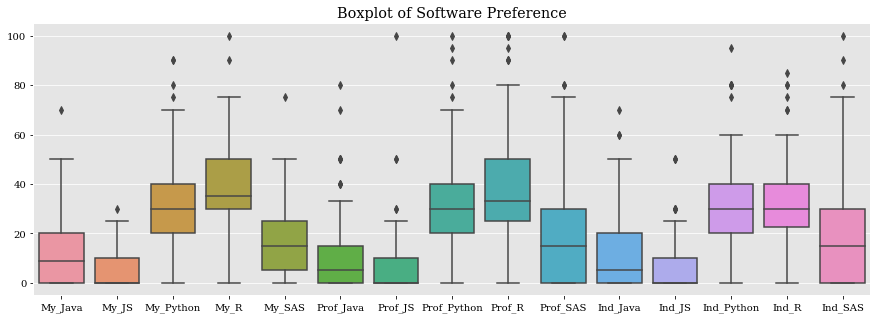

In [39]:
#Box and whisker plot
plt.figure(figsize = (15,5))
sns.boxplot(data=software_df)
plt.title("Boxplot of Software Preference")
plt.savefig('Boxplot-Software-Preference.pdf', 
    bbox_inches = 'tight')
plt.show()
plt.close()

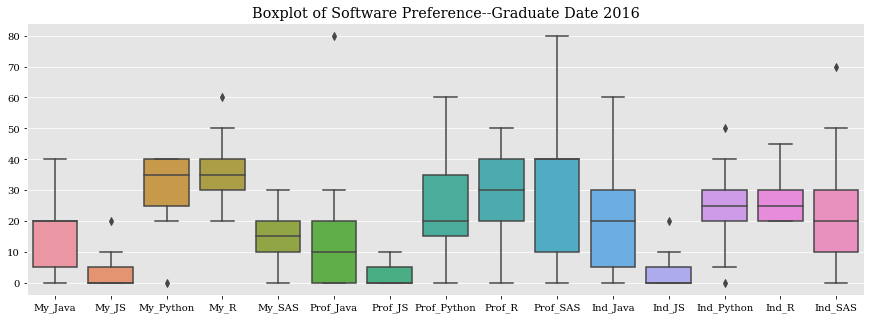

In [40]:
#Box and whisker plot
plt.figure(figsize = (15,5))
sns.boxplot(data=software_2016_df)
plt.title("Boxplot of Software Preference--Graduate Date 2016")
plt.savefig('Boxplot-Software-Preference-Graduate-Date-2016-Preference.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None)
plt.show()
plt.close()

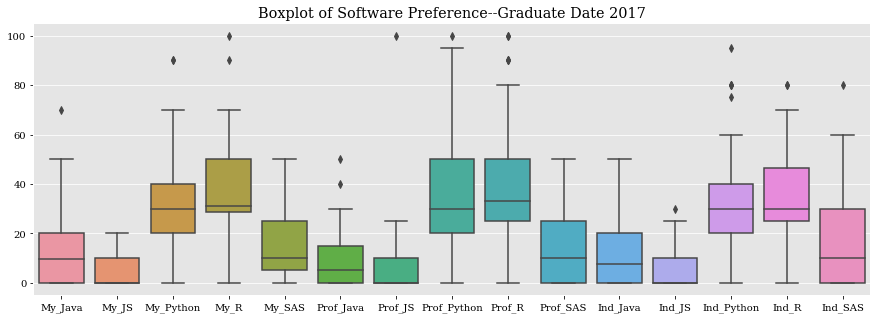

In [41]:
#Box and whisker plot
plt.figure(figsize = (15,5))
sns.boxplot(data=software_2017_df)
plt.title("Boxplot of Software Preference--Graduate Date 2017")
plt.savefig('Boxplot-Software-Preference-Graduate-Date-2017-Preference.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None)
plt.show()
plt.close()

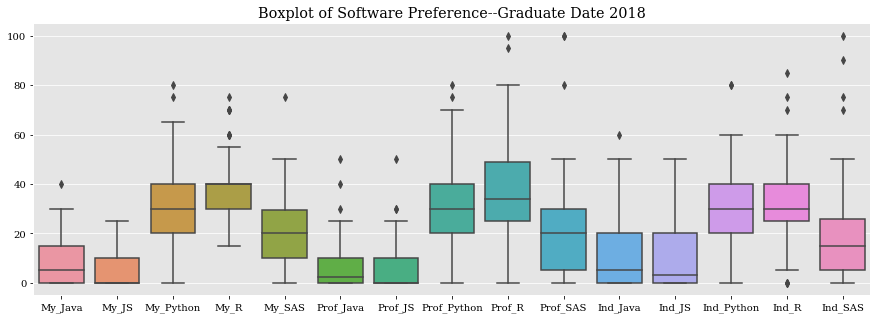

In [42]:
#Box and whisker plot
plt.figure(figsize = (15,5))
sns.boxplot(data=software_2018_df)
plt.title("Boxplot of Software Preference--Graduate Date 2018")
plt.savefig('Boxplot-Software-Preference-Graduate-Date-2018-Preference.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None)
plt.show()
plt.close()

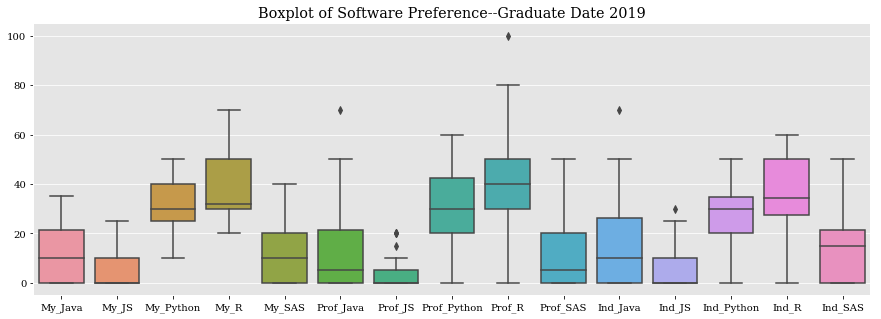

In [43]:
#Box and whisker plot
plt.figure(figsize = (15,5))
sns.boxplot(data=software_2019_df)
plt.title("Boxplot of Software Preference--Graduate Date 2019")
plt.savefig('Boxplot-Software-Preference-Graduate-Date-2019-Preference.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None)
plt.show()
plt.close()

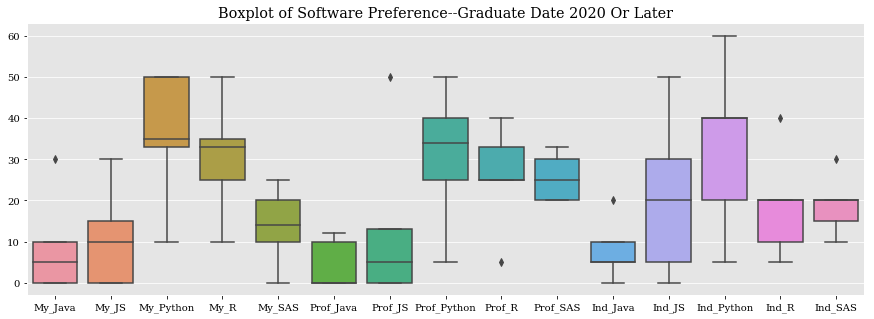

In [44]:
#Box and whisker plot
plt.figure(figsize = (15,5))
sns.boxplot(data=software_2020_OrLater_df)
plt.title("Boxplot of Software Preference--Graduate Date 2020 Or Later")
plt.savefig('Boxplot-Software-Preference-Graduate-Date-2020-Or-LaterPreference.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None)
plt.show()
plt.close()

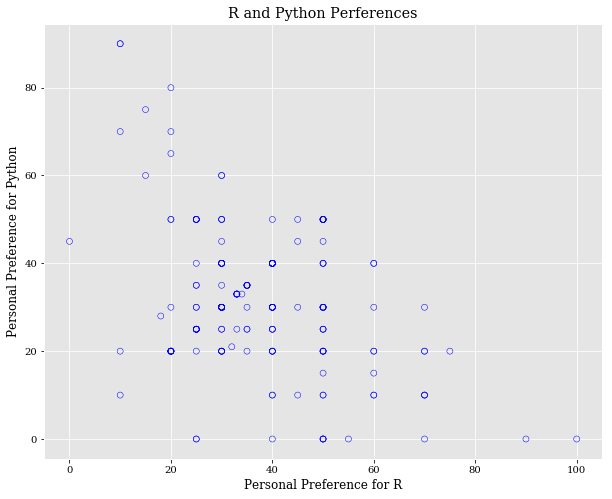

In [45]:
# scatter plot example
fig, axis = plt.subplots()
axis.set_xlabel('Personal Preference for R')
axis.set_ylabel('Personal Preference for Python')
plt.title('R and Python Perferences')
scatter_plot = axis.scatter(survey_df['My_R'], 
    survey_df['My_Python'],
    facecolors = 'none', 
    edgecolors = 'blue') 
plt.savefig('plot-scatter-r-python.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None)
plt.show()
plt.close()

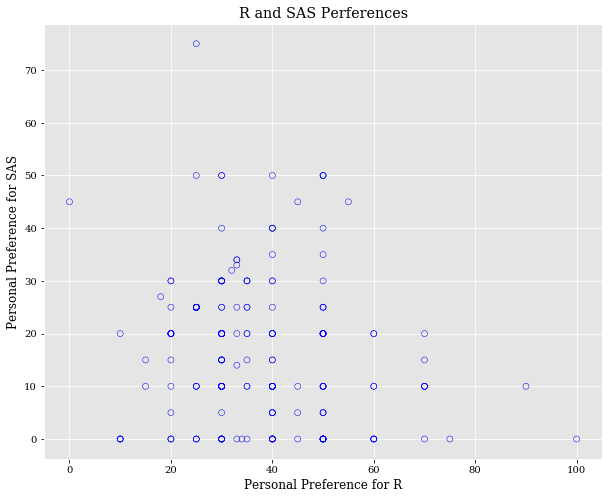

In [46]:
# scatter plot example
fig, axis = plt.subplots()
axis.set_xlabel('Personal Preference for R')
axis.set_ylabel('Personal Preference for SAS')
plt.title('R and SAS Perferences')
scatter_plot = axis.scatter(survey_df['My_R'], 
    survey_df['My_SAS'],
    facecolors = 'none', 
    edgecolors = 'blue') 
plt.savefig('plot-scatter-r-sas.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None)
plt.show()
plt.close()

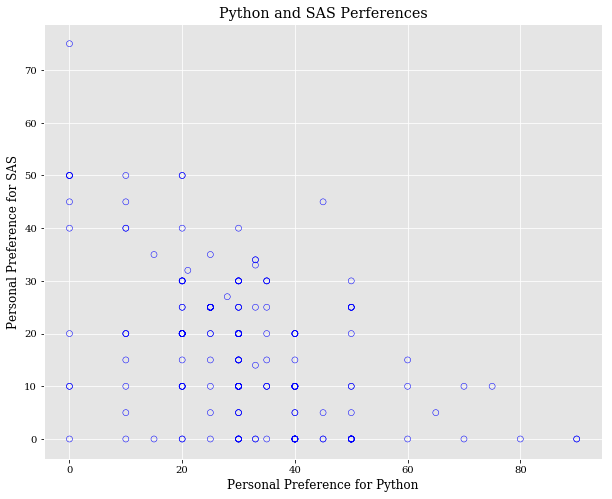

In [47]:
# scatter plot example
fig, axis = plt.subplots()
axis.set_xlabel('Personal Preference for Python')
axis.set_ylabel('Personal Preference for SAS')
plt.title('Python and SAS Perferences')
scatter_plot = axis.scatter(survey_df['My_Python'], 
    survey_df['My_SAS'],
    facecolors = 'none', 
    edgecolors = 'blue') 

plt.savefig('plot-scatter-python-sas.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None)
plt.show()
plt.close()

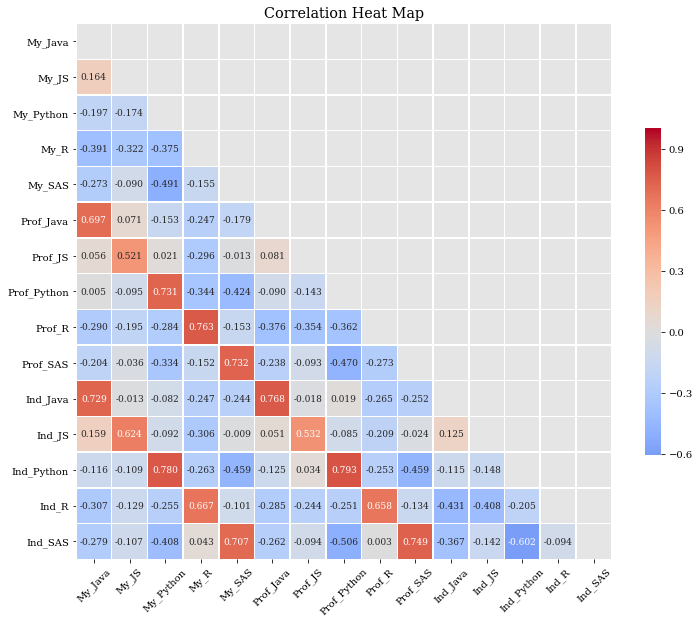

In [48]:
# examine intercorrelations among software preference variables
# with correlation matrix/heat map
corr_chart(df_corr = software_df) 
plt.savefig('intercorrelations-among-software-preference-variables.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None)
plt.show()
plt.close()

In [49]:
# display which courses differientiated by programming language were reported as taken the most
courseDiffByLanguage = pd.DataFrame(survey_df.loc[:, 'PREDICT400':'PREDICT457'].mode())
print("Courses Differientiated by Programming Language (taken the most)--------\n")
for course in courseDiffByLanguage:
    print(list(courseDiffByLanguage[course]))

Courses Differientiated by Programming Language (taken the most)--------

['PREDICT 400 Math for Modelers (Python)']
['PREDICT 401 Introduction to Statistical Analysis (R)']
['PREDICT 410 Regression and Multivariate Analysis (SAS)']
['PREDICT 411 Generalized Linear Models (SAS)']
['PREDICT 413 Time Series Analysis and Forecasting (R)']
['PREDICT 420 Database Systems and Data Preparation (Python)']
['PREDICT 422 Practical Machine Learning (R)']
['PREDICT 450 Marketing Analytics (R)']
['PREDICT 451 Risk Analytics (R)']
['PREDICT 452 Web Analytics and Network Data Science (Python)']
['PREDICT 453 Text Analytics (Python)']
['PREDICT 454 Advanced Modeling Techniques (R)']
['PREDICT 455 Data Visualization (R)']
['PREDICT 456 Sports Performance Analytics (R)']
['PREDICT 457 Sports Management Analytics (R)']


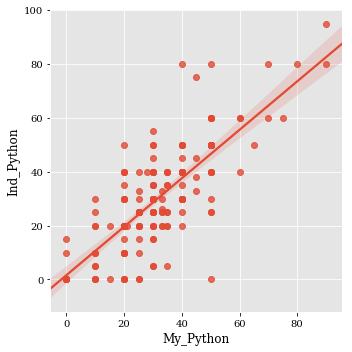

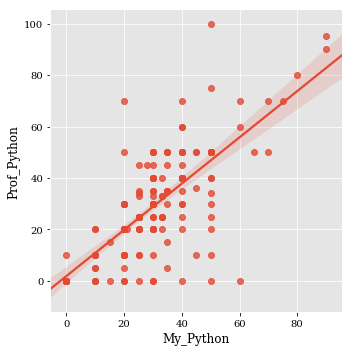

In [50]:
#Scatterplot, My_Python vs Ind_Python
sns.lmplot(x='My_Python', y='Ind_Python', data=software_df)
plt.savefig('My_Python-vs-Ind_Python.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None)
plt.show()
plt.close()

#Scatterplot, My_Python vs Prof_Python
sns.lmplot(x='My_Python', y='Prof_Python', data=software_df)
plt.savefig('My_Python-vs-Prof_Python.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None)
plt.show()
plt.close()


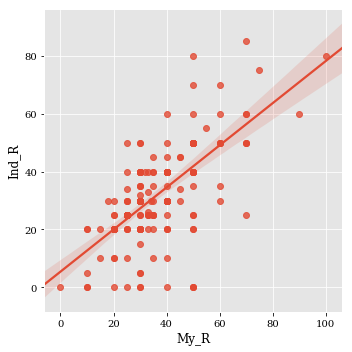

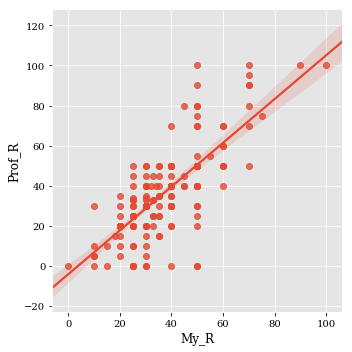

In [51]:
#Scatterplot, My_R vs Ind_R
sns.lmplot(x='My_R', y='Ind_R', data=software_df)
plt.savefig('My_R-vs-Ind_R.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None)
plt.show()
plt.close()

#Scatterplot, My_R vs Prof_R
sns.lmplot(x='My_R', y='Prof_R', data=software_df)
plt.savefig('My_R-vs-Prof_R.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None)
plt.show()
plt.close()

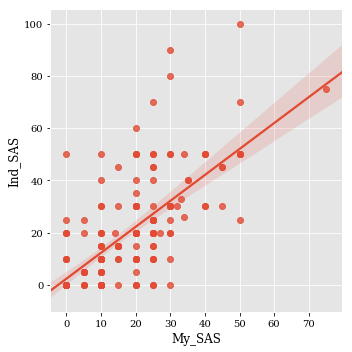

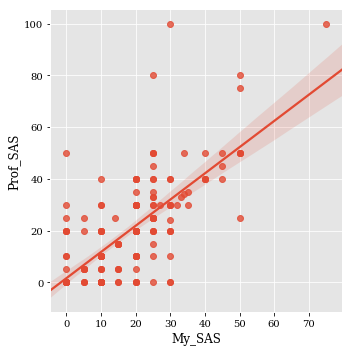

In [52]:
#Scatterplot, My_SAS vs Ind_SAS
sns.lmplot(x='My_SAS', y='Ind_SAS', data=software_df)
plt.savefig('My_SAS-vs-Ind_SAS.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None)
plt.show()
plt.close()

#Scatterplot, My_SAS vs Prof_SAS
sns.lmplot(x='My_SAS', y='Prof_SAS', data=software_df)
plt.savefig('My_SAS-vs-Prof_SAS.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None)
plt.show()
plt.close()
